@Author: Ayush Prajapati<br>
@Date: 27-09-2024<br>
@Last Modified by: Ayush Prajapati<br>
@Last Modified time: 27-09-2024 <br>
@Title: Python program to predict number of bikes
        using `Simple Linear Regression`<br>

<br>**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<br>**Importing Dataset**

In [ ]:
bike_df = pd.read_csv('/content/bike_sharing.csv')
display(bike_df.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


=========================================<br>
Dataset characteristics<br>
=========================================<br>
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

<br>**Structure and Stats of the dataset**

In [ ]:
bike_df.info()
print("\nStats for the dataset are:")
bike_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Stats for the dataset are:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


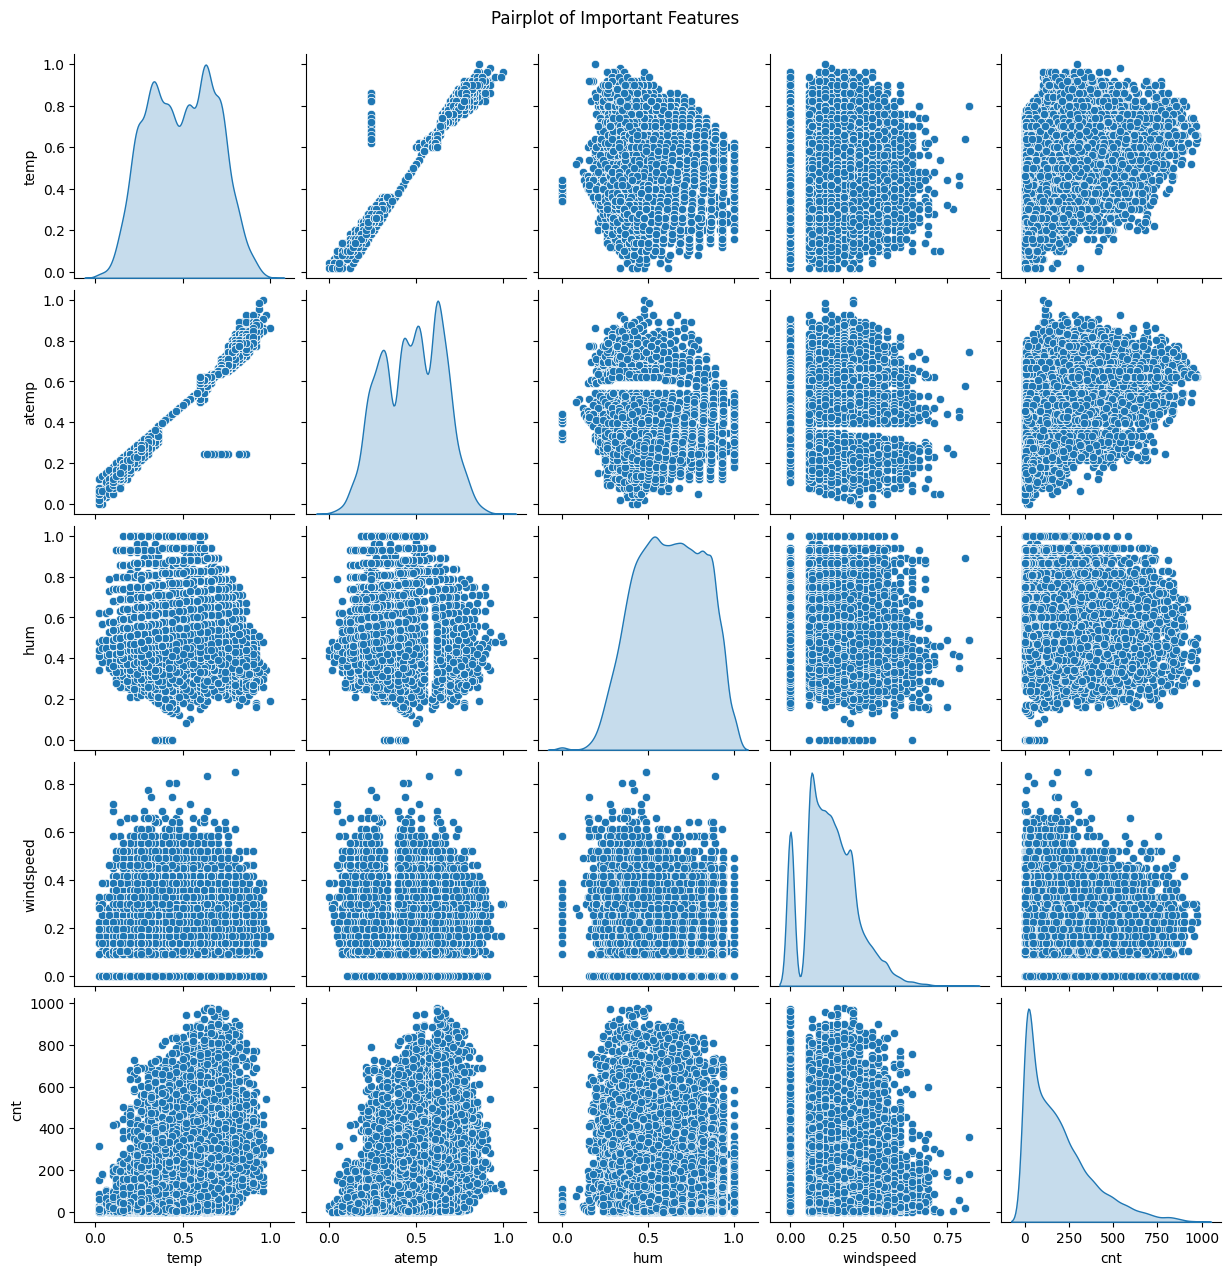

In [ ]:
# Selecting important features for the pair plot
important_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Creating the pair plot
sns.pairplot(bike_df[important_features], diag_kind='kde')

plt.suptitle('Pairplot of Important Features', y=1.02)
plt.show()

<br>**Visualize the relationship between years of experience and salary**

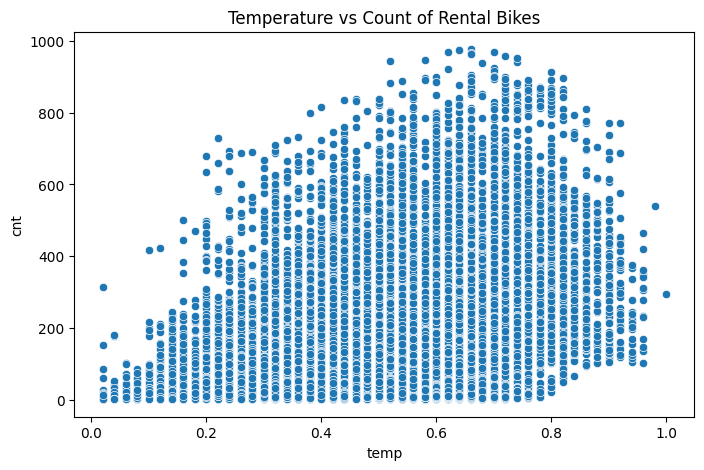

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=bike_df)
plt.title('Temperature vs Count of Rental Bikes')
plt.show()

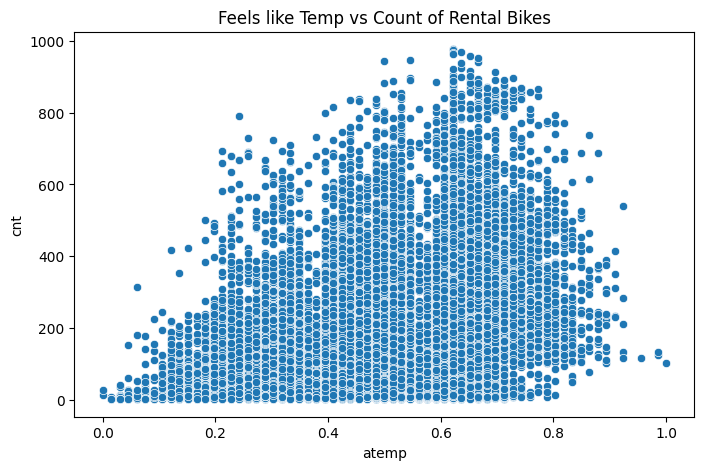

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='atemp', y='cnt', data=bike_df)
plt.title('Feels like Temp vs Count of Rental Bikes')
plt.show()

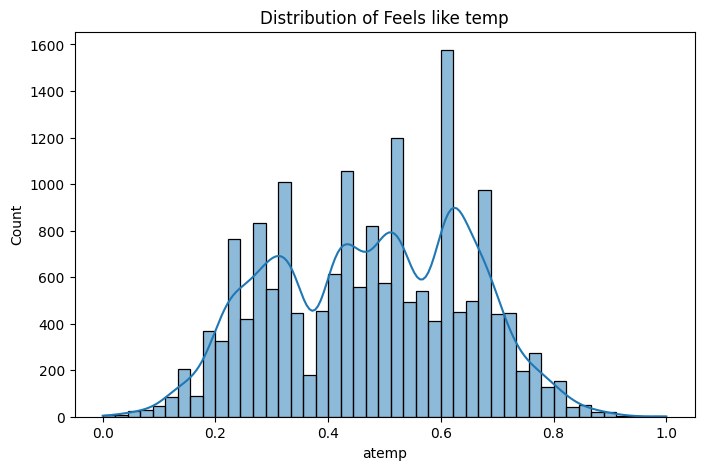

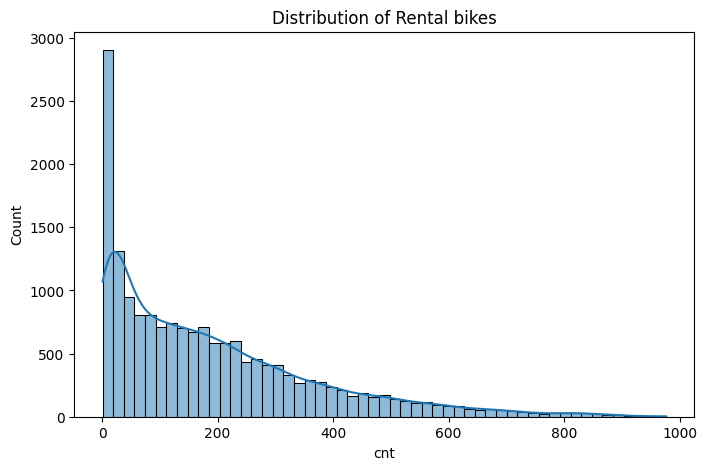

In [ ]:
# Histogram of Salary
plt.figure(figsize=(8, 5))
sns.histplot(bike_df['atemp'], kde=True)
plt.title('Distribution of Feels like temp')
plt.show()

# Histogram of Years of Experience
plt.figure(figsize=(8, 5))
sns.histplot(bike_df['cnt'], kde=True)
plt.title('Distribution of Rental bikes')
plt.show()

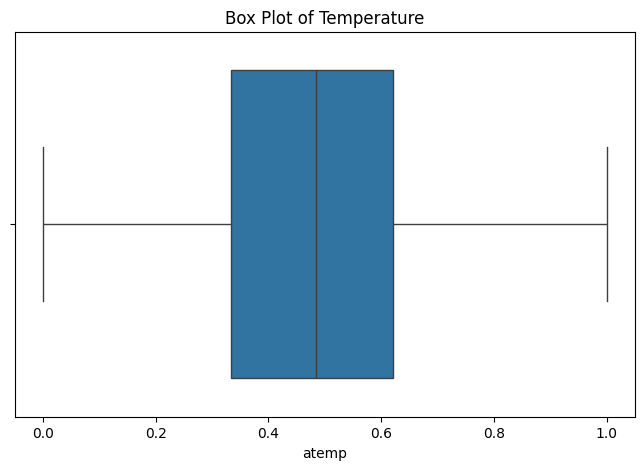

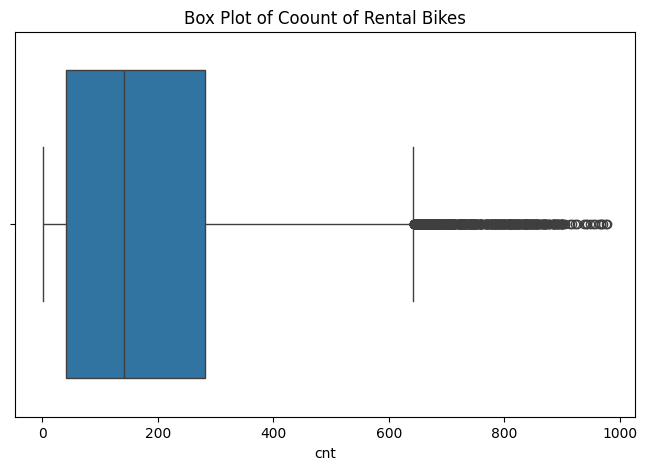

In [ ]:
# Box plot for detecting outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=bike_df['atemp'])
plt.title('Box Plot of Temperature')
plt.show()

# Box plot for Years of Experience
plt.figure(figsize=(8, 5))
sns.boxplot(x=bike_df['cnt'])
plt.title('Box Plot of Coount of Rental Bikes')
plt.show()


In [ ]:
Q1 = bike_df['cnt'].quantile(0.25)
Q3 = bike_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Filtering data to remove outliers
df_filtered = bike_df[~((bike_df['cnt'] < (Q1 - 1.5 * IQR)) | (bike_df['cnt'] > (Q3 + 1.5 * IQR)))]

In [ ]:
display(df_filtered.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


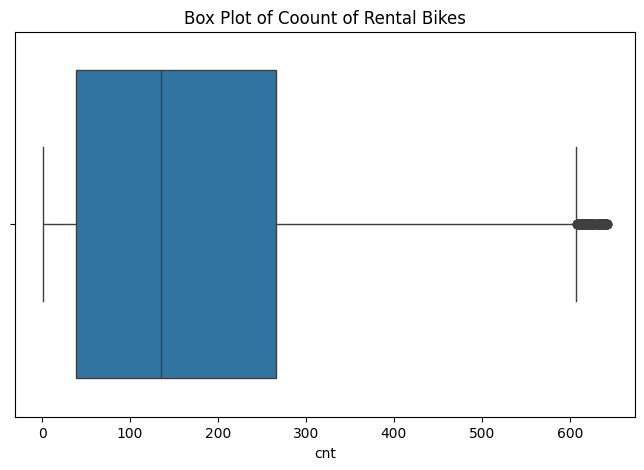

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered['cnt'])
plt.title('Box Plot of Coount of Rental Bikes')
plt.show()

In [ ]:
import numpy as np

In [ ]:
bike_df['cnt_log'] = np.log(bike_df['cnt'] + 1)

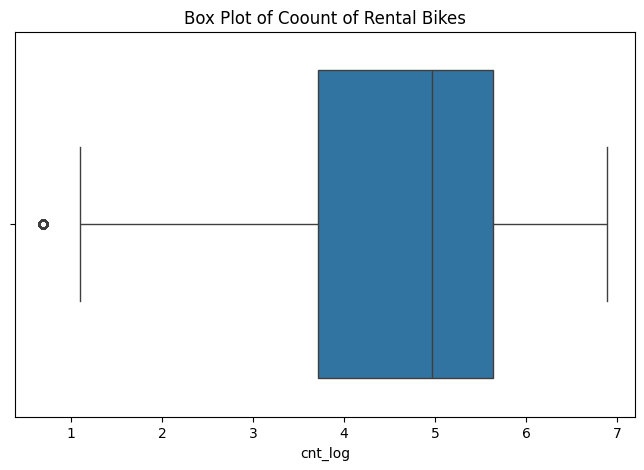

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=bike_df['cnt_log'])
plt.title('Box Plot of Coount of Rental Bikes')
plt.show()

In [ ]:
correlation_matrix = bike_df[['atemp', 'cnt']].corr()
print(correlation_matrix)

          atemp       cnt
atemp  1.000000  0.400929
cnt    0.400929  1.000000


<br>**Splitting the Data into Train and Test sets**

In [ ]:
X = bike_df[['atemp']]
y = bike_df[['cnt_log']]

<br>**Scale the feature (YearsExperience) and target (Salary)**

In [ ]:
# scaler_X = StandardScaler()
# scaler_Y = StandardScaler()

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

In [ ]:
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_Y.fit_transform(y)

<br>**Train Test Split**

In [ ]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
print(f"X_train Shape {X_train_scaled.shape}, X_test shape {X_test_scaled.shape}")
print(f"y_train Shape_{y_train_scaled.shape}, y_test shape {y_test_scaled.shape}")

X_train Shape (13903, 1), X_test shape (3476, 1)
y_train Shape_(13903, 1), y_test shape (3476, 1)


<br>**Fit the linear regression model**

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

<br>**Make Prediction**

In [ ]:
y_pred_scaled = model.predict(X_test_scaled)

<br>**Accuracy Metrics**

In [ ]:
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse = mse ** 0.5
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R Square: {r2}')


Mean Squared Error: 0.04397592915367407
Root Mean Squared Error: 0.2097043851560431
R Square: 0.14351204552938823


<br>**Inverse transform the predicted salaries back to original scale**

In [ ]:
y_pred_original = scaler_Y.inverse_transform(y_pred_scaled)
y_test_orignal = scaler_Y.inverse_transform(y_test_scaled)
X_test_orignal = scaler_X.inverse_transform(X_test_scaled)

<br>**Plotting the original data and the regression line**

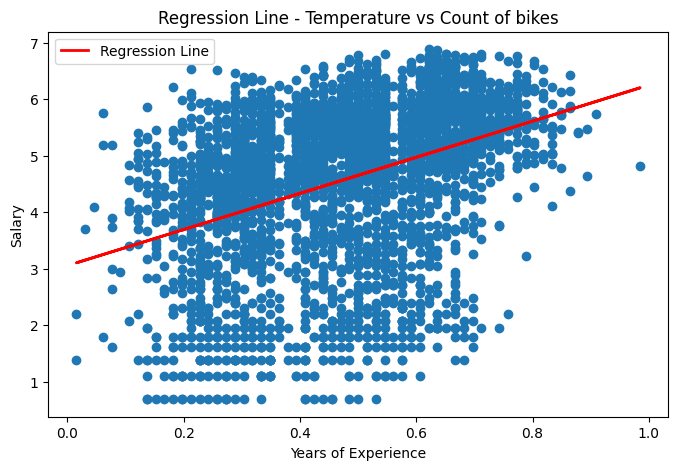

In [ ]:
plt.figure(figsize=(8, 5))
# sns.scatterplot(x='atemp', y='cnt', data=bike_df, label = 'Actual Points')

plt.scatter(x = X_test_orignal, y=y_test_orignal)
plt.plot(X_test_orignal, y_pred_original, color='red', linewidth=2, label = "Regression Line")
plt.title('Regression Line - Temperature vs Count of bikes')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()